In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
import time, copy,os
from numpy import pi, sin, cos, tan
import control
from numpy.fft import fft
import numpy as np

In [87]:
import os

In [88]:
import pylab_util as PU

In [89]:
ls *.csv

digcomp_fb_data_1.csv  digcomp_library_debugged.csv


In [90]:
fn = "digcomp_library_debugged.csv"

In [91]:
float_array = np.loadtxt(fn,delimiter=',')

In [92]:
t = float_array[:,0]

```
    Serial.print(t_ms);
    print_comma_then_int(error);
    print_comma_then_int(motor_speed);
    print_comma_then_int(raw_motor_speed);
    print_comma_then_int(G.get_reading());
```

In [93]:
e = float_array[:,1]
v_sat = float_array[:,2]
v_no_sat = float_array[:,3]
enc = float_array[:,-1]

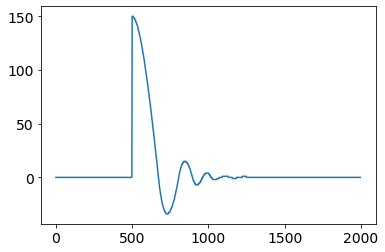

In [94]:
plt.figure()
plt.plot(t,e)

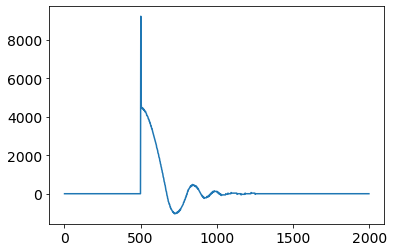

In [95]:
plt.figure()
plt.plot(t,v_no_sat)
#plt.ylim([-100,100])

In [96]:
b_vect = np.array([ 61.57894737, -33.15789474])

In [97]:
a_vect = np.array([ 1.        , -0.05263158])

In [98]:
import digcomp

In [99]:
Dz = digcomp.Digital_Compensator(b_vect,a_vect)
Dz

In [100]:
Dz.num

array([ 61.57894737, -33.15789474])

In [101]:
Dz.den

array([ 1.        , -0.05263158])

In [102]:
Dz.input = e

In [103]:
Dz.input

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

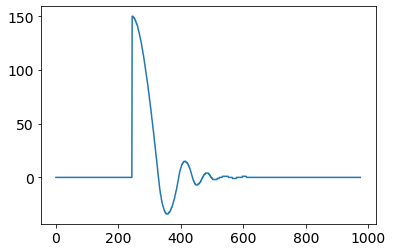

In [104]:
plt.figure()
plt.plot(Dz.input)

In [105]:
N = len(t)

In [106]:
N

975

In [107]:
dz_out_vect = np.zeros(N)

In [108]:
Dz.output = dz_out_vect

In [109]:
for i in range(1,N):
    Dz.output[i] = Dz.calc_out(i)

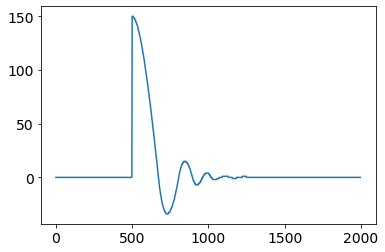

In [110]:
plt.figure()
plt.plot(t,Dz.input)#plt.ylim([-5,260])
#plt.xlim([0,2000])

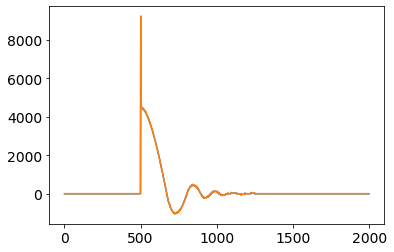

In [111]:
plt.figure()
plt.plot(t,Dz.output,t,v_no_sat)

In [112]:
v_no_sat.max()

9236.0

In [113]:
check = Dz.output-v_no_sat

In [114]:
check.max()

0.9956299107884661

In [115]:
check.min()

-0.9999872781578212

In [117]:
Dz.output.max()

9236.8421055